<a href="https://colab.research.google.com/github/robsonklug/Passageiros/blob/main/desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O desario 5, tem como finalidade realizar previsão do fluxo de passageiros de metro. Os dados são de 01/01/1989 a 01/08/2013. 
Como eram poucos dados, foi possível realizar os ajuste do csv diretamente no excel, colocando em um formato para facilitar a sua importação. 

Para a resolução eu usei 3 métodos: 

1 - ExponentialSmoothing 

2 - Arima

3 - Prophet 

In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np
import pandas.util.testing as tm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly


sns.set_style('darkgrid')
%matplotlib inline


In [ ]:
col_names = ["date", "value"]
df = pd.read_csv("file.csv",names = col_names, header = 0, parse_dates = [0])
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.set_index(['date'])
print(df.tail(20))

               value
date                
2012-01-01  27134731
2012-02-01  27541972
2012-03-01  32424333
2012-04-01  29167317
2012-05-01  30991861
2012-06-01  28602584
2012-07-01  28619352
2012-08-01  32249877
2012-09-01  29159023
2012-10-01  31532731
2012-11-01  28497408
2012-12-01  27587374
2013-01-01  27182332
2013-02-01  25949694
2013-03-01  30211955
2013-04-01  31177428
2013-05-01  30909462
2013-06-01  29148479
2013-07-01  28556730
2013-08-01  31594298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 1989-01-01 to 2013-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   296 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


**Plotar os Gráficos para entender como estão distribuídos os dados.**


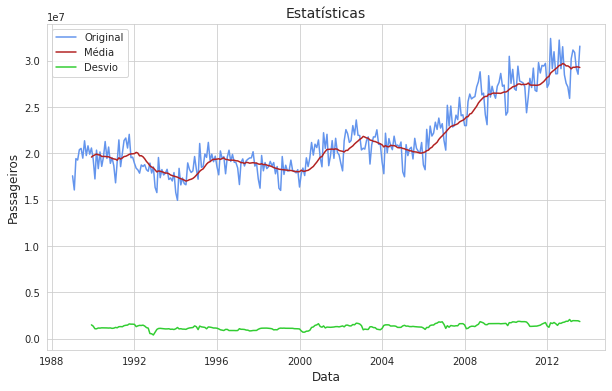

In [ ]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()
plt.figure(figsize = (10,6))
plt.plot(df, color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Média')
plt.plot(rolling_std, color='limegreen', label='Desvio')
plt.xlabel('Data', size = 12)
plt.ylabel('Passageiros', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Estatísticas', size = 14)
plt.show()

*Pode-se oberservar uma tendencia de ascendente ao logo do periodo*

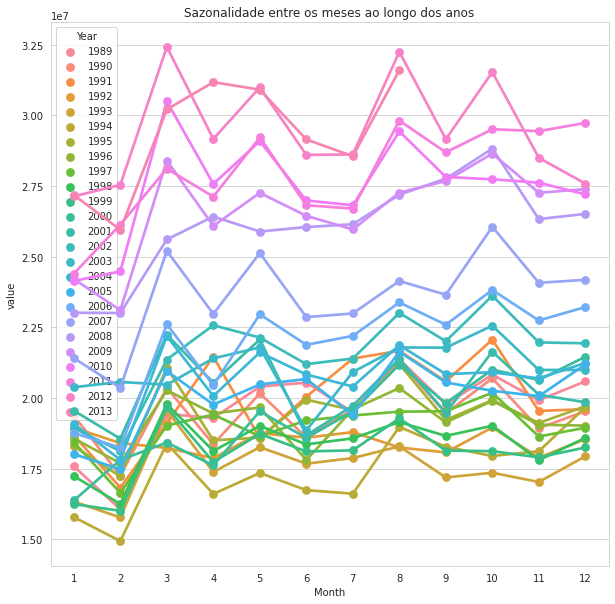

In [ ]:
#Avaliando se exise alguma sazonalidade entre os meses ao logo dos anos.
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
plt.figure(figsize=(10,10))
plt.title('Sazonalidade entre os meses ao longo dos anos')
sns.pointplot(x='Month',y='value',hue='Year',data=df_temp)

========================= ExponentialSmoothing ================================

 - A suavização exponencial é um método de previsão de séries temporais para dados univariados que podem ser estendidos para suportar dados com uma tendência sistemática ou componente sazonal. As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações anteriores, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.

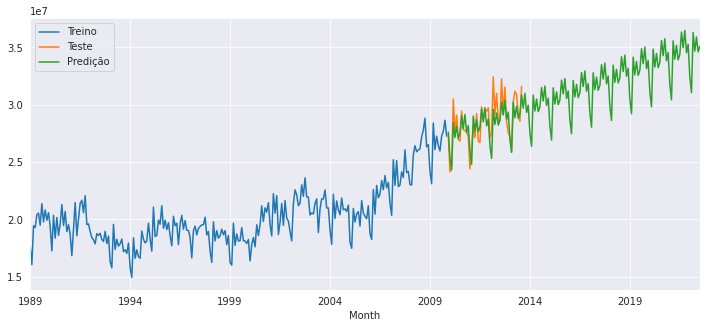

In [ ]:
df = pd.read_csv('file.csv', index_col = 'Month', parse_dates = True)
df.index.freq = 'MS'
df.head()
#separando os dados de treino e de teste (85% treino)
train_date=df[0:int(len(df)*0.85)] 
test_data=df[int(len(df)*0.85):]
fitted_model = ExponentialSmoothing(train_date['Passengers'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()
test_predictions = fitted_model.forecast(152)
train_date['Passengers'].plot(legend=True, label = 'Treino',figsize = (12,5))
test_data['Passengers'].plot(legend=True, label = 'Teste')
test_predictions.plot(legend=True, label = 'Predição')

In [ ]:
test_predictions.tail(30)

2020-02-01    2.980788e+07
2020-03-01    3.485126e+07
2020-04-01    3.328735e+07
2020-05-01    3.446623e+07
2020-06-01    3.322456e+07
2020-07-01    3.368301e+07
2020-08-01    3.559914e+07
2020-09-01    3.426779e+07
2020-10-01    3.574628e+07
2020-11-01    3.382817e+07
2020-12-01    3.455179e+07
2021-01-01    3.177719e+07
2021-02-01    3.042261e+07
2021-03-01    3.557000e+07
2021-04-01    3.397383e+07
2021-05-01    3.517703e+07
2021-06-01    3.390975e+07
2021-07-01    3.437765e+07
2021-08-01    3.633330e+07
2021-09-01    3.497449e+07
2021-10-01    3.648348e+07
2021-11-01    3.452581e+07
2021-12-01    3.526435e+07
2022-01-01    3.243253e+07
2022-02-01    3.105001e+07
2022-03-01    3.630356e+07
2022-04-01    3.467447e+07
2022-05-01    3.590248e+07
2022-06-01    3.460907e+07
2022-07-01    3.508662e+07
Freq: MS, dtype: float64

**Previsto de 35M para a data de Julho de 2022**

========================= ARIMA ================================

O modelo Auto-Regressive Integrated Moving Average (ARIMA) descreve as autocorrelações nos dados. O modelo assume que a série temporal é estacionária.


In [ ]:
dataset = pd.read_csv('file.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['Month'])
indexedDataset.tail(10)

,Passengers
Month,
2012-11-01,28497408
2012-12-01,27587374
2013-01-01,27182332
2013-02-01,25949694
2013-03-01,30211955
2013-04-01,31177428
2013-05-01,30909462
2013-06-01,29148479
2013-07-01,28556730


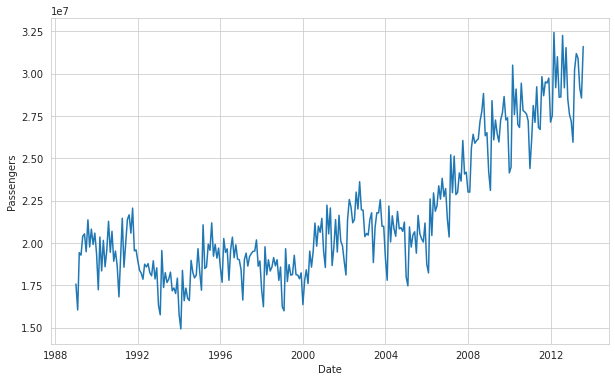

In [ ]:
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(indexedDataset)

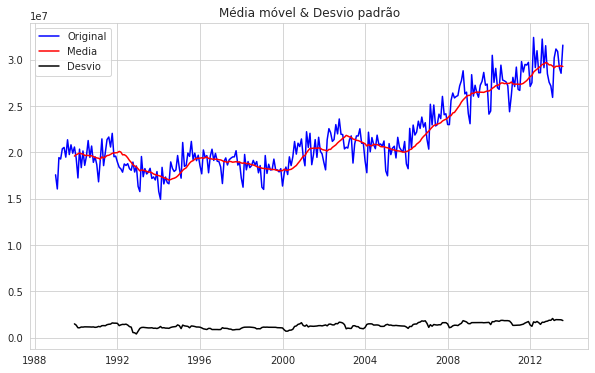

In [ ]:
#Plotagem de Rolling Statistics: traçar a média ou a variância móvel e ver se 
#varia com o tempo. Por média/variância móvel, ou seja, que em qualquer 
#instante ‘t’, vamos comparar a média/variância com a do último ano, 
#(últimos 12 meses). Mas, esta é mais uma técnica visual.
rolmean = indexedDataset.rolling(window=12).mean() 
rolstd = indexedDataset.rolling(window=12).std()
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Media')
std = plt.plot(rolstd, color='black', label='Desvio')
plt.legend(loc='best')
plt.title('Média móvel & Desvio padrão')
plt.show(block=False)

No gráfico acima, vemos que a média móvel tem um componente de tendência, embora o desvio padrão contínuo seja bastante constante com o tempo. Para nossa hipótese de que a série temporal não é estacionária, vamos realizar o teste ADCF.

In [ ]:
#Dickey-Fuller teste: esse é um dos testes estatísticos para verificar Estacionaridade. 
#Aqui, a hipótese nula é que o TS é não-estacionária. Os resultados do teste são 
#compostos por uma estatística de teste e alguns valores críticos para os níveis 
#de confiança da diferença.
print('Resultado do teste Dickey Fuller')
dftest = adfuller(indexedDataset['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste','p-value','#Lags Used','Número de obs. usadas'])
for key,value in dftest[4].items():
    dfoutput['Valor Crítico (%s)'%key] = value
print(dfoutput)

Resultado do teste Dickey Fuller
Estatística de Teste       0.397988
p-value                    0.981420
#Lags Used                16.000000
Número de obs. usadas    279.000000
Valor Crítico (1%)        -3.454008
Valor Crítico (5%)        -2.871956
Valor Crítico (10%)       -2.572320
dtype: float64


Resultados: Para que uma série temporal seja estacionária, seu teste deve ter:

p-value baixo (que pode chegar a 1).

Os valores críticos em intervalos de confiança de 1%,5%,10% devem ser o mais próximo possível das Estatísticas de Teste.

A partir do resultado do teste acima, vemos que o p-value (no máximo pode ser 1,0) é muito grande. Os valores críticos também não estão nem perto das Estatísticas de Teste. Portanto, podemos dizer com segurança que nossa Série Temporal no momento não é estacionária

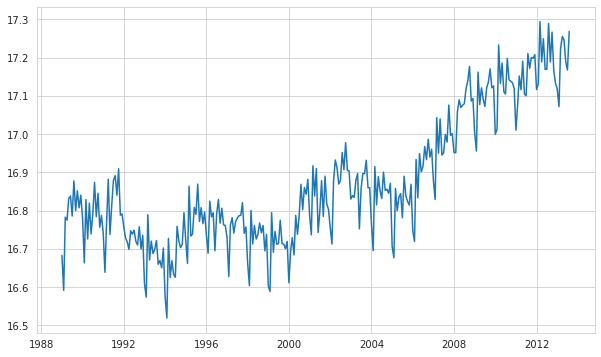

In [ ]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

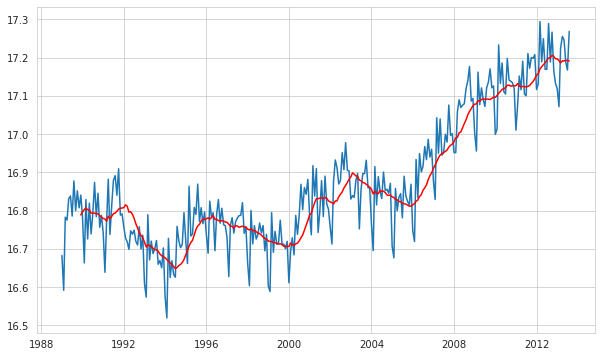

In [ ]:
#A transformação abaixo é necessária para tornar a série estacionária
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [ ]:
#O gráfico acima mostra que tanto a série temporal com escala logarítmica 
#quanto sua média móvel possuem um componente de tendência. 
#Assim, podemos subtrair um do outro deve remover o componente de tendência de ambos.
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Removendo valores NAN
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
1989-12-01,0.051627
1990-01-01,-0.017014
1990-02-01,-0.139494
1990-03-01,0.022458
1990-04-01,-0.076713
1990-05-01,0.017906
1990-06-01,-0.054177
1990-07-01,-0.002985
1990-08-01,0.080373


In [ ]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Média')
    std = plt.plot(movingSTD, color='black', label='Desvio')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Resultado do teste Dickey Fuller:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste','p-value','#Lags Used','Número de obs. usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)

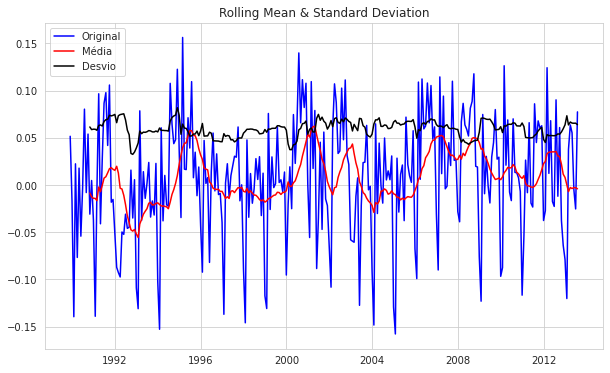

Resultado do teste Dickey Fuller:
Estatística de Teste      -3.908987
p-value                    0.001970
#Lags Used                16.000000
Número de obs. usadas    268.000000
Valor Crítico (1%)        -3.454988
Valor Crítico (5%)        -2.872386
Valor Crítico (10%)       -2.572549
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

O p-value foi reduzido de 0,99 para 0,0019.

Os valores críticos em intervalos de confiança de 1%,5%,10% estão bem próximos da estatística de teste.

Assim, podemos dizer que nossa série dada é estacionária.

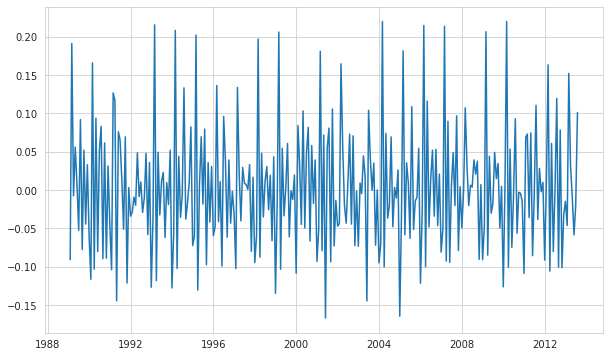

In [ ]:
#Usando a Diferenciação (tomando a diferença com um determinado intervalo de tempo)
#para a redução de tendencias
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
datasetLogDiffShifting.dropna(inplace=True)
plt.plot(datasetLogDiffShifting)

Plotting ARIMA model


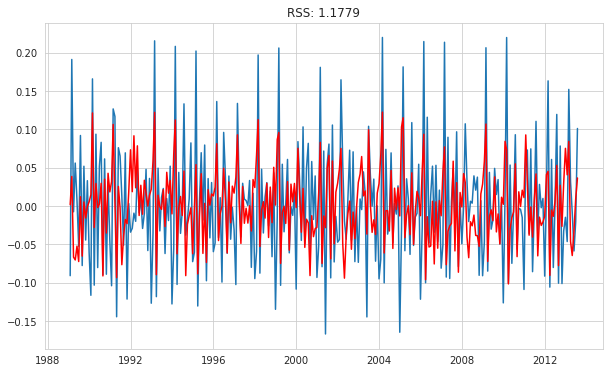

In [ ]:
#MA+AR Model
#Os modelos AR e MA combinado é significativamente melhor com RSS = 1.17 (fiz testes separado). 
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting ARIMA model')

In [ ]:
#trazer os valores de volta para a escala original.
#1 - armazenar os resultados previstos como uma série separada
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#2 - converter a diferenciação de escala logarítmica adicionando essas diferenças 
#consecutivamente ao número base
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#3 - adicioná-los ao número base
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
#4 - Fazer a inversão do LOG (que usamos o exp)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

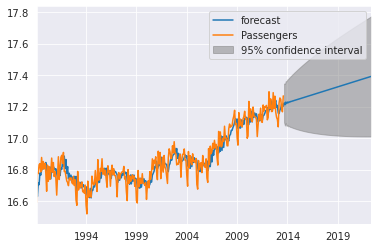

In [ ]:
# Aqui ainda preciso entender o pq os dados não retornaram na origem, talvez eu
# usei alguma variável errada. 
results_ARIMA.plot_predict(1,400) 
x=results_ARIMA.forecast(steps=120)

========================= Prophet ================================




In [ ]:
data = pd.read_csv('DemandaMetro - simples.csv') 
data['TOTAL'] = pd.to_numeric(data['TOTAL'], errors='coerce')
data['Mes-ano'] = pd.to_datetime(data['Mes-ano'])
data = data.set_index('Mes-ano')
data.tail()

,TOTAL
Mes-ano,
2013-01-04,31177428
2013-01-05,30909462
2013-01-06,29148479
2013-01-07,28556730
2013-01-08,31594298


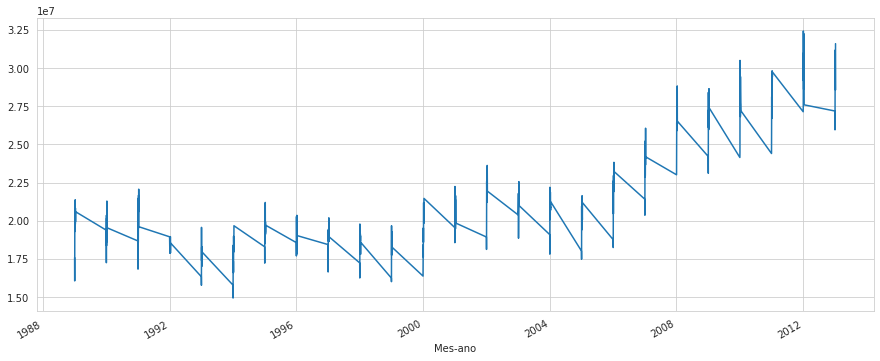

In [ ]:
plt.figure(figsize = (15,6))
data['TOTAL'].plot(kind = 'line')

In [ ]:
fb_data = data.reset_index().rename(columns = {'Mes-ano':'ds', 'TOTAL':'y'})
train,test = train_test_split(fb_data,test_size = 0.3)
m = Prophet(interval_width=0.95)
m.fit(train)
future = m.make_future_dataframe(periods=120, freq = 'M')
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnowy8iq/_k7f_2p_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnowy8iq/fufumvmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9896', 'data', 'file=/tmp/tmpxnowy8iq/_k7f_2p_.json', 'init=/tmp/tmpxnowy8iq/fufumvmw.json', 'output', 'file=/tmp/tmpkus8g4pj/prophet_model-20220728200525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


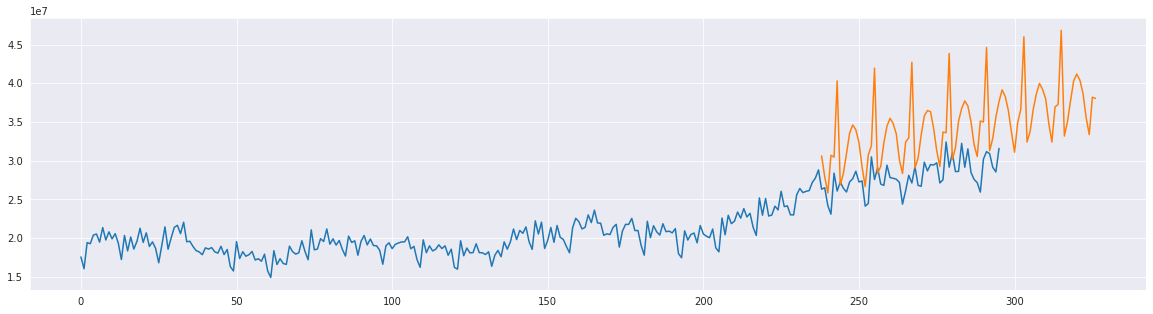

In [ ]:
fb_data['y'].plot(kind = 'line')
forecast[int(forecast.shape[0])- int(test.shape[0]):]['yhat'].plot(kind = 'line', figsize = (20,5))

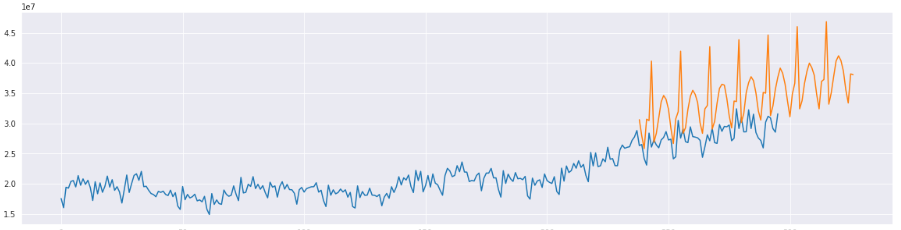

In [ ]:
plot_plotly(m ,forecast)

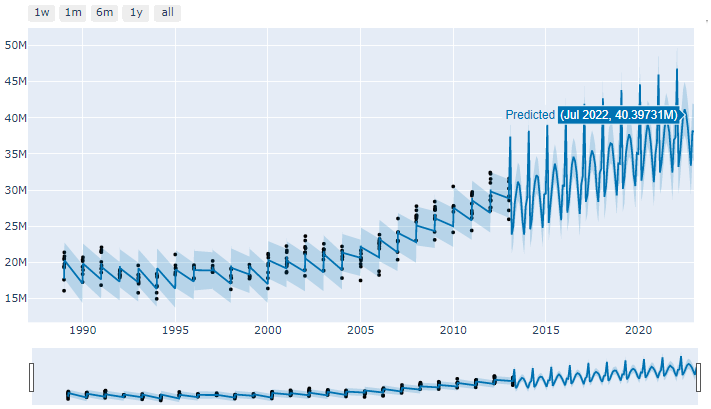

## **Pela previsão, serão cerca de 40.39 M em Julho de 2022**